<div style="border: 2px solid #007acc; padding: 15px; border-radius: 10px; background-color: #f0f8ff; text-align: left;">
    <h1 style="text-align: center;"><b><i>Road Traffic Accident Analysis in the United Kingdom. </i></b></h1>
</div>

<div style="border: 2px solid #007acc; padding: 3px; border-radius: 10px; background-color: #007acc; text-align: left;"> </div>

<div style="border: 2px solid #007acc; padding: 15px; border-radius: 10px; background-color: #f0f8ff; text-align: left;">
    <h2 style="text-align: left; font-size: 27px;"><b>Step 3: 📝 Exploratory Data Analysis (EDA) & Visualizations - Part 2.</b></h2>
</div>

<div style="border: 2px solid #007acc; padding: 3px; border-radius: 10px; background-color: #007acc; text-align: left;"> </div>

#### **About:**
#### Continuation of Part 1 of Exploratory Data Analysis (EDA) & Visualizations.

# 3.1 📥 Importing Libraries and Load the Data.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 600px;"> </div>

## 3.1.1 Import Necessary Libraries.

<div style="border: 2px solid #007acc; padding: 3px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 37%;"> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1.2 Data Loading.

<div style="border: 2px solid #007acc; padding: 3px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 20%;"> </div>

In [2]:
# Data Loading
print('\n Loading the Road Accident Data...\n')

# Read the CSV file. The file is assumed to be in the specified directory.
df = pd.read_csv(r'C:\Entri\Project\data\my_clean_data_index.csv', encoding='UTF-8-SIG')
#df = pd.read_csv(r'C:\Entri\Project\data\Road Accident Data.csv', keep_default_na=False, na_values=[], encoding='UTF-8-SIG')

# Display dataframe shape and few rows.
print('Dataset loaded with shape:', df.shape)
print ("Dataset have:", df.shape[0], "rows and", df.shape[1], "columns")


 Loading the Road Accident Data...

Dataset loaded with shape: (307971, 18)
Dataset have: 307971 rows and 18 columns


<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 99%;"> </div>

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 29%;"> </div>

In [4]:
df["Accident_DateTime"] = pd.to_datetime(df["Accident_DateTime"], errors="coerce")

# Extract features
df["Year"] = df["Accident_DateTime"].dt.year
df["Month"] = df["Accident_DateTime"].dt.month
df["DayOfWeek"] = df["Accident_DateTime"].dt.day_name()
df["Hour"] = df["Accident_DateTime"].dt.hour

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 99%;"> </div>

# 3.5 🔗 Multivariate Analysis.¶

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 40%;"> </div>

### 1. Pairwise Relationships: Casualties, Vehicles, Speed & Severity.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 59%;"> </div>

#### Graph: Pair Plot

This visualization displays scatter plots and KDE distributions for multiple numeric variables, including Number_of_Casualties, Number_of_Vehicles, Speed_limit, and Accident_Severity.
Data points are color-coded by Accident_Severity to reveal severity-specific patterns.
The diagonal shows the distribution of each variable, while the off-diagonals reveal relationships and clustering patterns across variables.

#### ⚡Focus:
Explore interrelationships among accident severity, casualties, vehicles involved, and speed limits to identify potential trends or risk factors.

### Below plot took lot of time and blocking github from loading so disabling

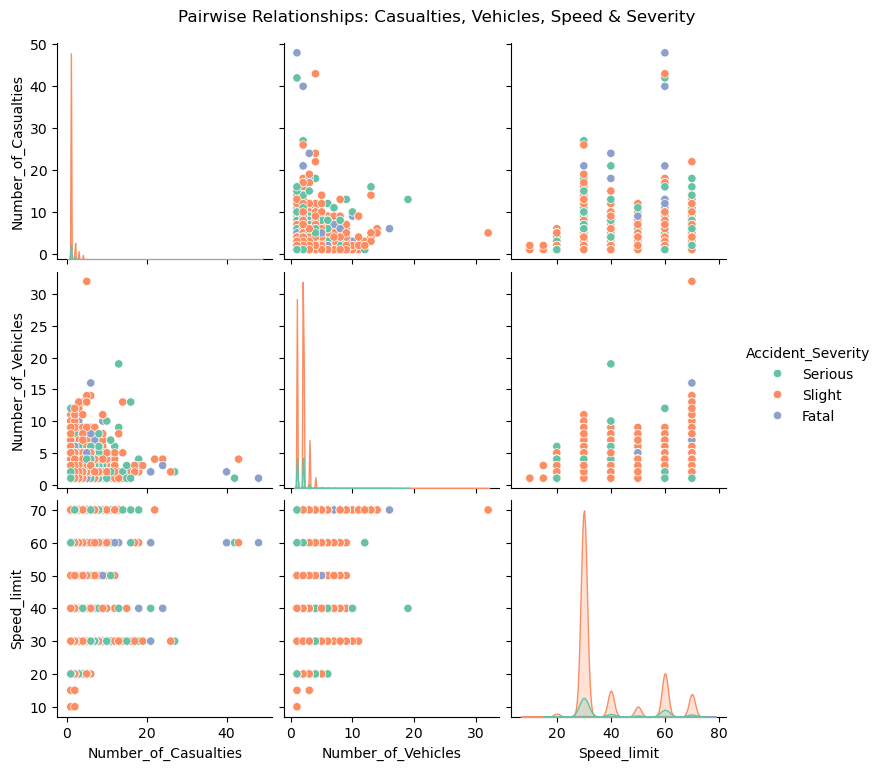

In [5]:
#This is disabling because a lot of time to load.
# Pairplot with better styling
sns.pairplot(
    df[["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit", "Accident_Severity"]],
    hue="Accident_Severity",
    diag_kind="kde",
    height=2.5,
    palette="Set2"
)

plt.suptitle("Pairwise Relationships: Casualties, Vehicles, Speed & Severity", y=1.02)
plt.show()


#### 🔍 Insight: 
Higher accident severity often corresponds to a larger number of casualties, while speed limits and vehicle counts show moderate correlation patterns. Severe accidents tend to cluster in areas with both higher casualties and vehicle counts.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 2. Correlation Heatmap of Numeric Features.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 43%;"> </div>

#### Graph: Heatmap
This visualization displays the correlation matrix for numeric variables, excluding Year, Month, and Hour. Each cell shows the Pearson correlation coefficient between two variables, with color intensity indicating the strength and direction of the relationship. Strong positive correlations appear in warm colors, while strong negative correlations appear in cool colors, helping identify dependent or independent features.

#### ⚡Focus:
Examine relationships between numeric variables in the dataset while ignoring time-related columns (Year, Month, Hour).

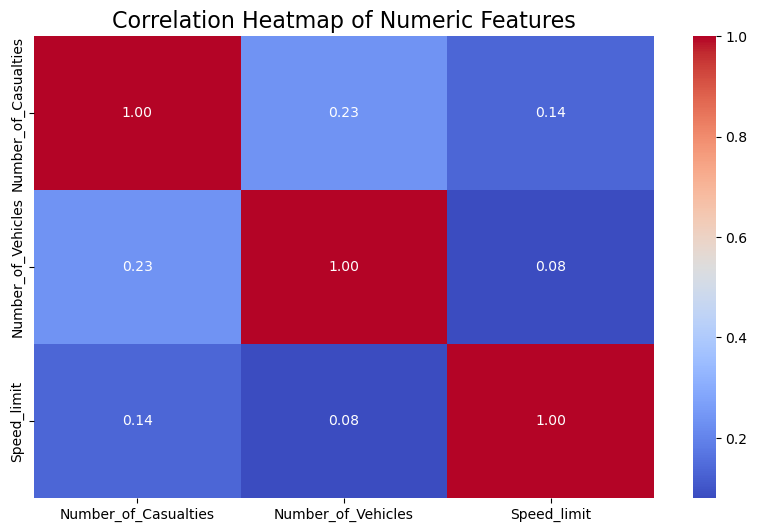

In [6]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.¶
# Select only numeric columns, excluding Year, Month, Hour
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Year','Month','Hour'], errors='ignore')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


#### 🔍 Insight:
The heatmap shows that Number_of_Vehicles and Number_of_Casualties are strongly positively correlated, indicating that accidents involving more vehicles tend to result in higher casualties. Speed_limit shows weaker correlations with other variables, suggesting it is more independent. Accident_Severity has moderate correlations with casualties and vehicles, highlighting its connection to accident impact.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 3. FacetGrid Scatter Plot – Vehicle vs Casualties Analysis.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 53%;"> </div>

#### Graph: FacetGrid Scatter Plot

This visualization displays scatter plots of Number_of_Vehicles vs Number_of_Casualties for each Light_Condition, with points color-coded by Weather_Conditions. Multiple subplots reveal how accident patterns vary under different lighting conditions, while the color indicates the influence of weather.

#### ⚡Focus:
Examine how the number of vehicles and casualties relate across different light and weather conditions, highlighting patterns specific to each scenario.

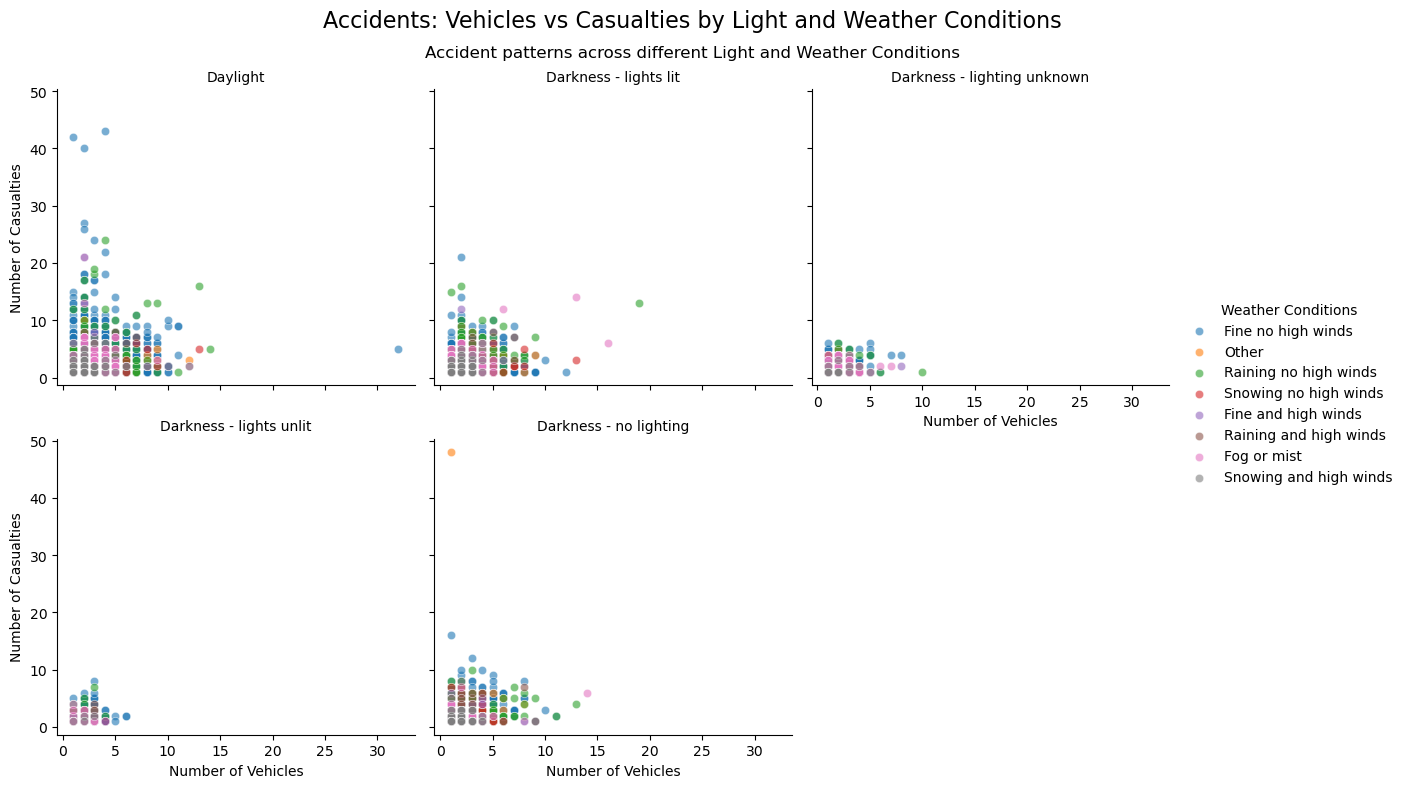

In [7]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# FacetGrid Scatter Plot: Number of Vehicles vs Number of Casualties by Light and Weather Conditions
g = sns.FacetGrid(df, 
                  col="Light_Conditions", 
                  hue="Weather_Conditions", 
                  col_wrap=3, 
                  height=4, 
                  sharex=True, 
                  sharey=True)

# Plot scatter points
g.map(sns.scatterplot, "Number_of_Vehicles", "Number_of_Casualties", alpha=0.6)

# Add legend and titles
g.add_legend(title="Weather Conditions")
g.set_axis_labels("Number of Vehicles", "Number of Casualties")
g.set_titles(col_template="{col_name}")  # Show Light Condition as subplot title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Accidents: Vehicles vs Casualties by Light and Weather Conditions", fontsize=16)

plt.subplots_adjust(top=0.88)  # adjust to make space for subtitle
g.fig.text(0.5, 0.92, "Accident patterns across different Light and Weather Conditions", ha='center', fontsize=12)

plt.show()


#### 💡Insight:
Higher numbers of vehicles generally correlate with more casualties, especially under poor lighting conditions such as darkness or low visibility. Certain weather conditions, like rain or fog, amplify this effect, showing clusters with higher casualty counts.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 4. Casualty Analysis by Light Conditions and Accident Severity.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 60%;"> </div>

#### Graph: Boxplot – Casualties by Light & Severity

This visualization shows the distribution of Number_of_Casualties across different Light_Conditions, with Accident_Severity indicated by color. Each box represents the spread of casualties for a specific light condition and severity, highlighting medians, quartiles, and outliers.

#### ⚡Focus:

Compare how accident severity affects casualty counts under different lighting conditions, emphasizing patterns in low-light or adverse situations.

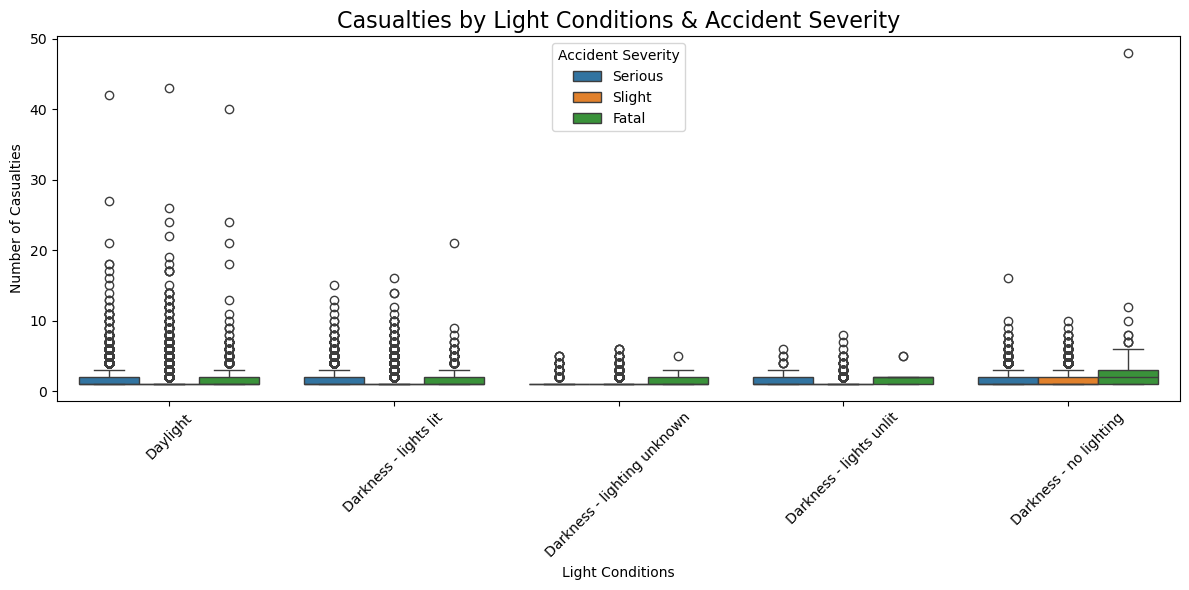

In [8]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.¶
# Accident_Severity (cat) × Light_Conditions (cat) × Number_of_Casualties (num).
# Main Heading: Casualty Analysis by Light Conditions and Accident Severity

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="Light_Conditions",          # categorical (x-axis)
    y="Number_of_Casualties",      # numeric (y-axis)
    hue="Accident_Severity"        # second categorical (color/hue)
)

# Titles and labels for clarity
plt.xticks(rotation=45)
plt.xlabel("Light Conditions")
plt.ylabel("Number of Casualties")
plt.title("Casualties by Light Conditions & Accident Severity", fontsize=16)
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()

#### 💡Insight:

Severe accidents tend to result in higher casualties, especially in poor lighting conditions like darkness or dusk. Minor accidents usually cluster near lower casualty counts, while outliers indicate rare but extreme casualty events. This helps identify high-risk light conditions for targeted safety measures.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 5. Casualty Analysis by Road Type and Accident Severity.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 54%;"> </div>

#### Graph: Boxplot – Casualties by Road Type & Severity

This visualization shows the distribution of Number_of_Casualties across different Road_Type categories, with Accident_Severity indicated by color. Each box represents the spread of casualties for a specific road type and severity, highlighting medians, quartiles, and outliers.

#### ⚡Focus:

Compare how accident severity affects casualty counts across different types of roads, highlighting high-risk road types.

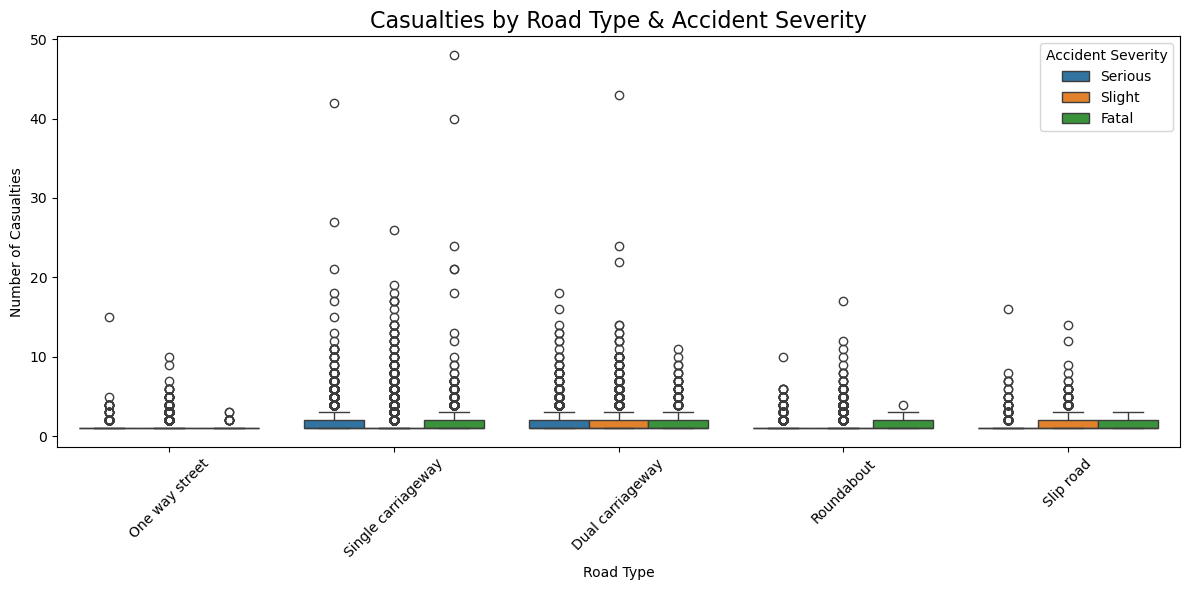

In [9]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.¶
# Accident Severity × Road Type × Number of Casualties
# Main Heading: Casualty Analysis by Road Type and Accident Severity

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="Road_Type",                # categorical (x-axis)
    y="Number_of_Casualties",     # numeric (y-axis)
    hue="Accident_Severity"       # second categorical (color/hue)
)

# Titles and labels for clarity
plt.xticks(rotation=45)
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.title("Casualties by Road Type & Accident Severity", fontsize=16)
plt.legend(title="Accident Severity")
plt.tight_layout()
plt.show()


#### 💡Insight:

Severe accidents on highways and major roads tend to result in higher casualties, while minor roads generally show lower casualty counts. Outliers indicate rare events with unusually high casualties, emphasizing the importance of safety measures on high-speed or heavily trafficked roads.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 6. Accident Severity by Area Type and Weather Conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 55%;"> </div>

#### Graph: FacetGrid – Urban/Rural × Weather × Accident Severity

This visualization displays the count of accidents for each Accident_Severity across Urban and Rural areas, with Weather_Conditions indicated by color. Each subplot represents an area type, making it easier to compare patterns without clutter.

#### ⚡Focus:
Analyze how accident severity is influenced by the combination of area type and weather conditions, highlighting high-risk scenarios across all weather conditions.

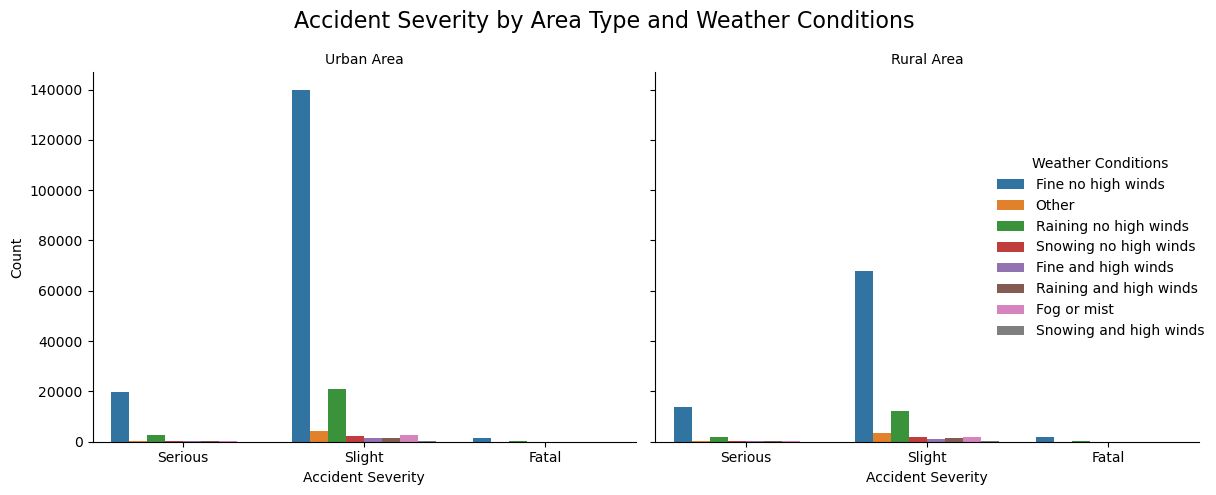

In [10]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.¶
# FacetGrid: separate plots for Urban and Rural areas
g = sns.catplot(
    data=df,
    kind="count",
    x="Accident_Severity",
    hue="Weather_Conditions",
    col="Urban_or_Rural_Area",
    height=5,
    aspect=1
)

# Titles and labels
g.fig.suptitle("Accident Severity by Area Type and Weather Conditions", fontsize=16)
g.set_axis_labels("Accident Severity", "Count")
g.set_titles("{col_name} Area")
g._legend.set_title("Weather Conditions")

plt.tight_layout()
plt.show()


#### 💡Insight:

Rural areas generally have higher counts of severe and fatal accidents under adverse weather, while urban areas mostly show minor accidents. This multi-dimensional view highlights the need for safety measures targeting specific weather and area conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 7. Extended Correlation Analysis – Numerical & Categorical Features.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 65%;"> </div>

#### Graph: Heatmap – Numerical + Encoded Categorical Features

This visualization displays the correlation matrix between numeric variables (Number_of_Vehicles, Number_of_Casualties, Speed_limit) and encoded categorical features. Each cell shows the Pearson correlation coefficient, with color intensity indicating the strength and direction of relationships. Warm colors represent strong positive correlations, while cool colors represent strong negative correlations.

#### ⚡Focus:

Identify and emphasize strong linear relationships between numeric features and encoded categorical variables. This helps quickly spot which factors most influence accident severity and casualty counts, while weak correlations are de-emphasized for clarity.

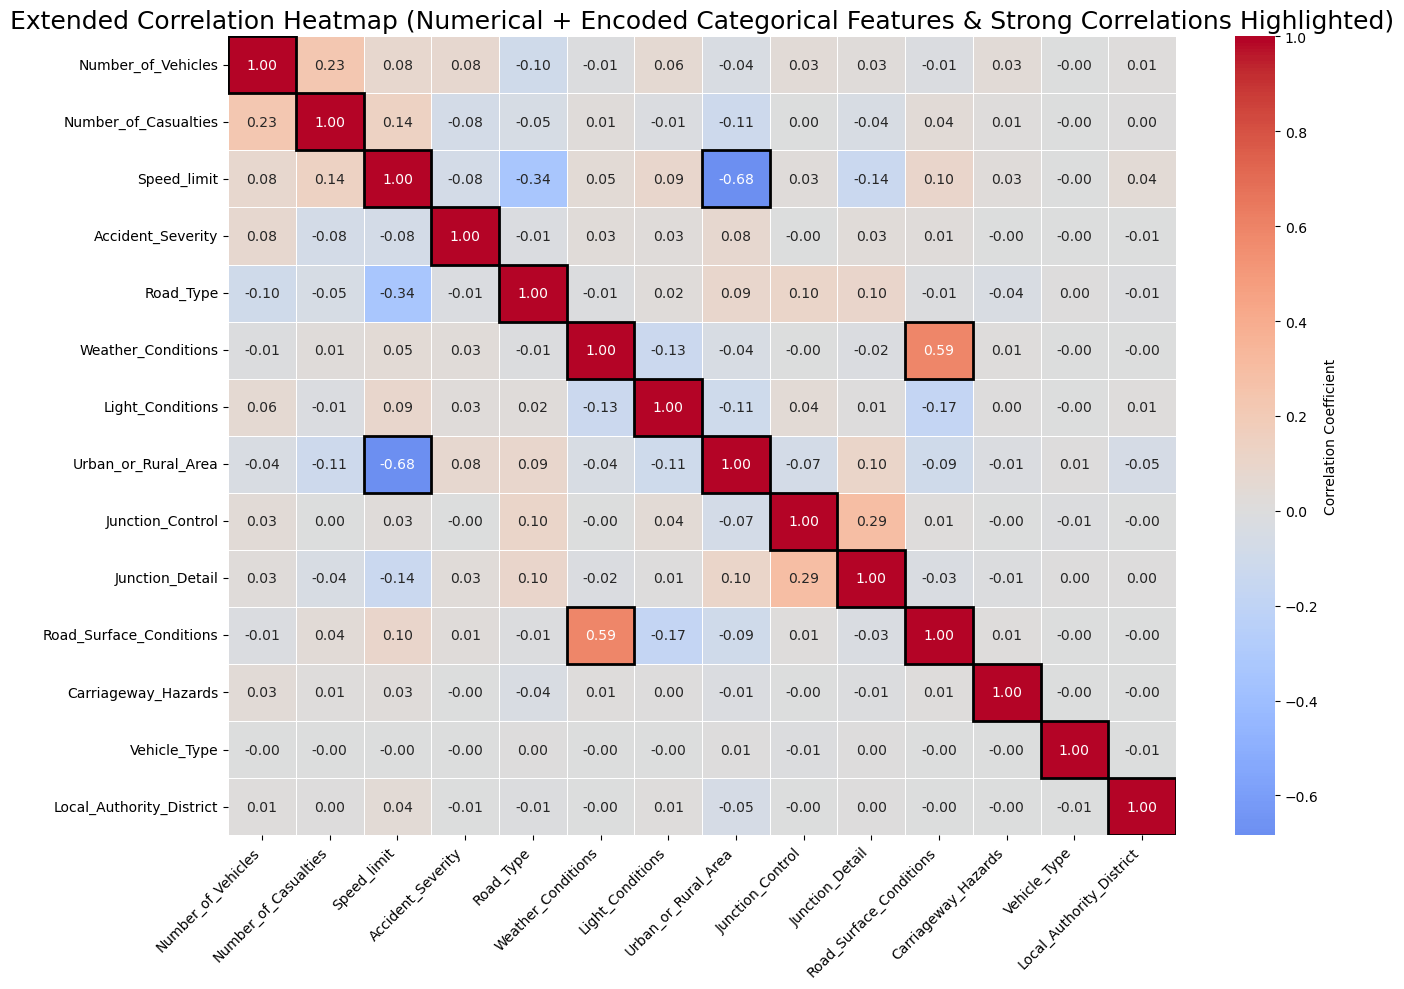

In [11]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# Encode categorical variables using LabelEncoder and compute correlations 
# between numerical features (Number_of_Vehicles, Number_of_Casualties, Speed_limit) 
# and encoded categorical features. Finally, visualize the correlation matrix 
# as a heatmap to explore potential linear relationships.

from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid overwriting original
df_encoded = df.copy()

# Categorical columns to encode
categorical_cols = [
    'Accident_Severity', 'Road_Type', 'Weather_Conditions',
    'Light_Conditions', 'Urban_or_Rural_Area',
    'Junction_Control', 'Junction_Detail',
    'Road_Surface_Conditions', 'Carriageway_Hazards',
    'Vehicle_Type', 'Local_Authority_District'
]

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Select numeric + encoded columns
selected_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit'] + categorical_cols
corr = df_encoded[selected_cols].corr()

# Highlight strong correlations
strong_corr = corr.copy()
strong_corr[np.abs(strong_corr) < 0.5] = 0  # set weak correlations to 0 for emphasis

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,
    cbar_kws={'label': 'Correlation Coefficient'},
    linewidths=0.5
)

# Overlay strong correlations with a bold border
for i in range(len(corr)):
    for j in range(len(corr)):
        if abs(corr.iloc[i, j]) >= 0.5:
            plt.gca().add_patch(plt.Rectangle((j,i),1,1, fill=False, edgecolor='black', lw=2))

# Titles and labels
plt.title("Extended Correlation Heatmap (Numerical + Encoded Categorical Features & Strong Correlations Highlighted)", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 💡Insight:

Number_of_Vehicles and Number_of_Casualties have a strong positive correlation, confirming that accidents involving more vehicles tend to result in higher casualties.

Accident_Severity shows moderate to strong positive correlations with Number_of_Casualties and certain features like Light_Conditions and Road_Type, indicating that severe accidents are associated with specific road and lighting conditions.

Vehicle_Type and Carriageway_Hazards show strong correlations with other variables, suggesting their influence on accident outcomes.

Many encoded categorical variables exhibit weak correlations (<0.5) with numeric features, indicating independence or minimal linear relationship.

This heatmap allows quick identification of key features for predictive modeling, focusing on those with strong correlations to casualties and severity.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 8. Feature Correlation with Number of Casualties.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 47%;"> </div>

#### Graph: Bar Plot – Feature Correlation

This visualization shows the Pearson correlation of all numeric and encoded categorical features with Number_of_Casualties. Features are sorted by correlation strength, with warm colors indicating strong positive correlations and cool colors indicating weaker or negative correlations.

#### ⚡Focus:

Quickly identify the features most strongly associated with the number of casualties, emphasizing those with significant linear relationships.

This complements the Insight section and aligns with the visual emphasis on strong correlations.

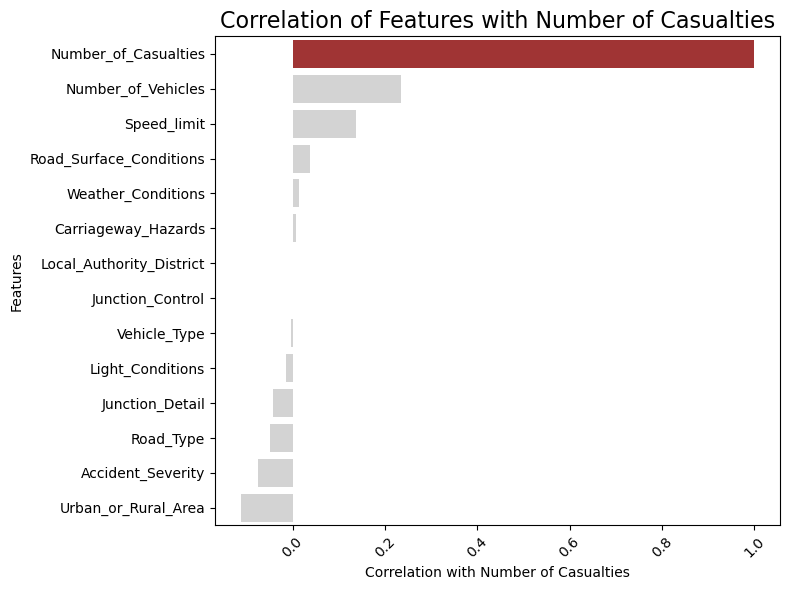

In [12]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
plt.figure(figsize=(8,6))

# Correlation of all features with Number_of_Casualties
casualty_corr = corr['Number_of_Casualties'].sort_values(ascending=False)

# Create color array: strong correlations (>=0.5) in dark red, others in light gray
colors = ['firebrick' if abs(x) >= 0.5 else 'lightgray' for x in casualty_corr.values]

# Barplot
sns.barplot(
    x=casualty_corr.values,
    y=casualty_corr.index,
    hue=casualty_corr.index,
    palette=colors, #"coolwarm",
    dodge=False,
    legend=False               # hide duplicate legend
)
plt.title("Correlation of Features with Number of Casualties", fontsize=16)
plt.xlabel("Correlation with Number of Casualties")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 💡Insight:

Number_of_Vehicles shows the strongest positive correlation with casualties, emphasizing that accidents involving more vehicles tend to result in higher casualty counts.

Accident_Severity and Light_Conditions have moderate positive correlations, highlighting their influence on accident outcomes.

Other features, including most encoded categorical variables, show weak correlations (<0.5), indicating they have minimal linear relationship with casualty counts.

Highlighting strong correlations visually allows quick identification of key factors to prioritize for modeling, safety analysis, or targeted interventions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 9. Feature Correlation with Number of Casualties (One-Hot Encoded).

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 65%;"> </div>

#### Graph: Bar Plot – Correlation of All Features

This visualization shows the correlation of numeric and one-hot encoded categorical features with Number_of_Casualties, sorted by strength. The color intensity indicates the magnitude and direction of the correlation.

#### ⚡Focus:

Examine which one-hot encoded features (e.g., specific road types, light conditions, or junction controls) are most associated with casualty counts to identify important factors influencing accidents.

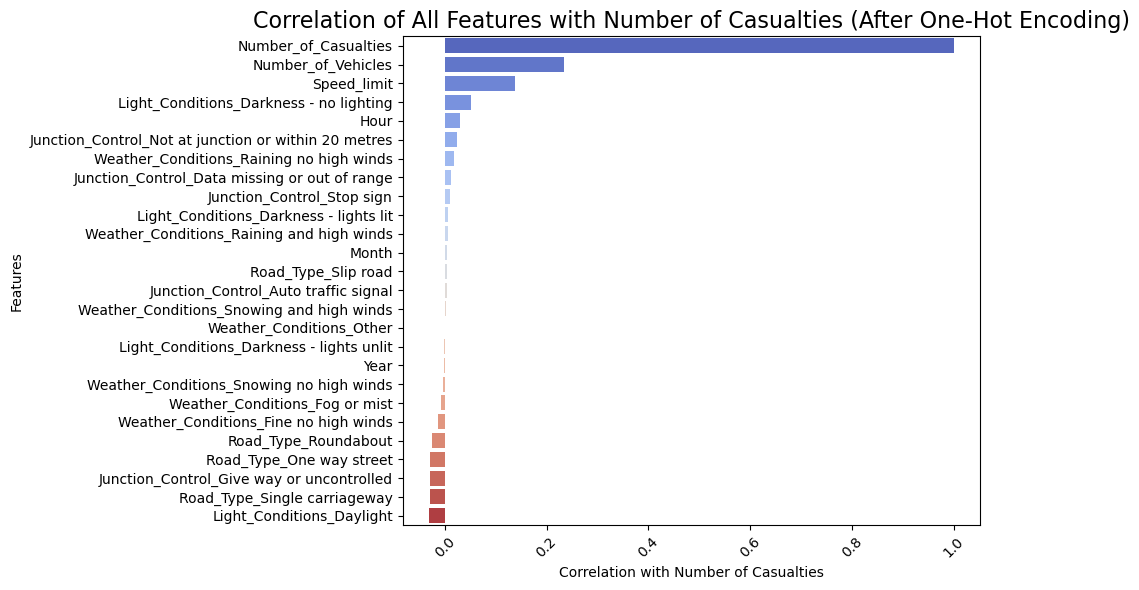

In [13]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# One-hot encode selected categorical columns
df_encoded = pd.get_dummies(df, columns=["Road_Type", "Weather_Conditions", 
                                         "Light_Conditions", "Junction_Control"],
                            drop_first=True)

# Compute correlation with Number_of_Casualties
casualty_corr = df_encoded.corr(numeric_only=True)["Number_of_Casualties"].sort_values(ascending=False)

# Plot barplot
plt.figure(figsize=(10,6))
sns.barplot(x=casualty_corr.values, y=casualty_corr.index, palette="coolwarm", hue=casualty_corr.index, legend=False )
plt.title("Correlation of All Features with Number of Casualties (After One-Hot Encoding)", fontsize=16)
plt.xlabel("Correlation with Number of Casualties")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 💡Insight:

Original numeric features like Number_of_Vehicles remain the strongest predictors of casualties.

Certain one-hot encoded categories, such as specific Road_Type or Light_Conditions, show moderate correlations, highlighting their influence on accident severity.

This detailed view helps identify specific scenarios (e.g., particular road types or junction controls) that contribute more to casualty counts, aiding targeted safety measures or predictive modeling.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 10. Casualties by Severity × Junction Control × Light Conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 60%;"> </div>

#### Graph: FacetGrid Boxplot – Casualties Across Junctions and Light Conditions

This visualization displays the distribution of Number_of_Casualties for each Light_Conditions, with Accident_Severity indicated by color. Multiple subplots represent different Junction_Control types, allowing comparison of accident severity patterns across junction types and lighting conditions.

#### ⚡Focus:

Examine how accident severity and lighting conditions interact at different junction types to identify scenarios with higher casualty risks.

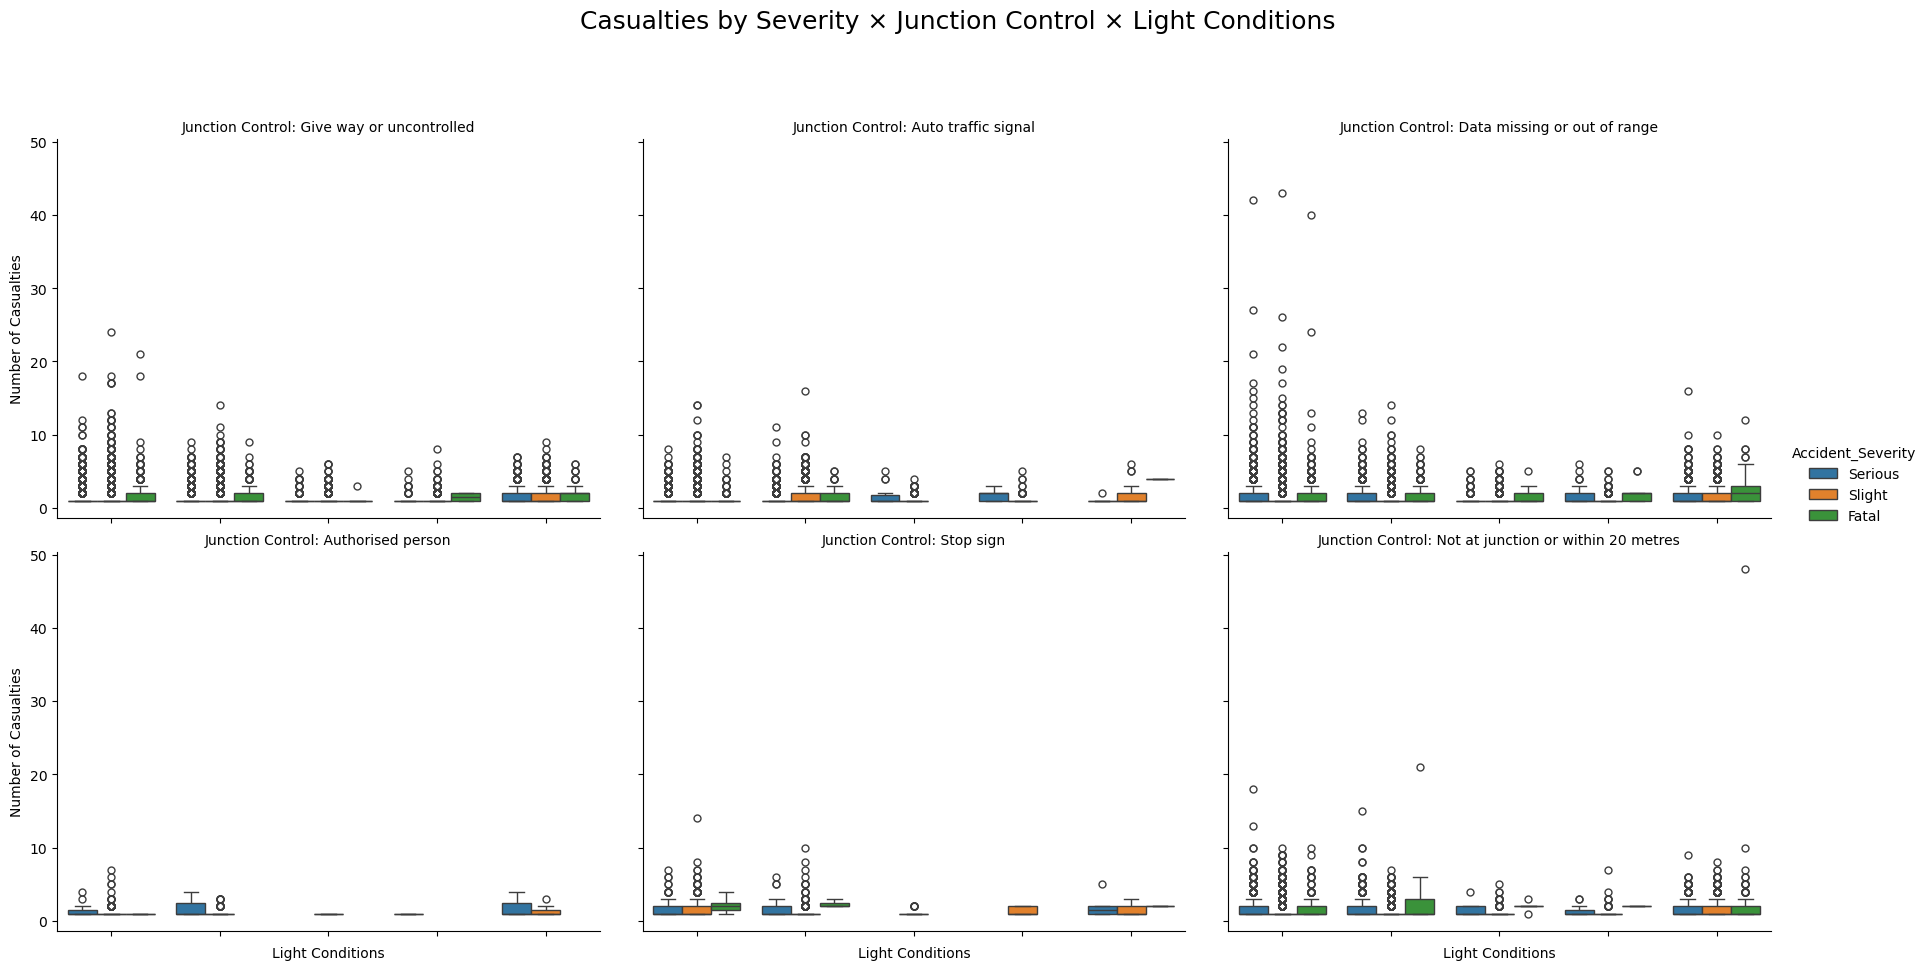

In [15]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# FacetGrid Boxplot: Number of Casualties by Light Conditions, Accident Severity, and Junction Control

# Increase figure size for readability
g = sns.catplot(
    x="Light_Conditions",
    y="Number_of_Casualties",
    hue="Accident_Severity",
    col="Junction_Control",
    data=df,
    kind="box",
    col_wrap=3,   # makes multiple columns wrap into rows
    height=5,     # size of each small plot
    aspect=1.2    # width/height ratio
)

# Improve readability
g.set_titles("Junction Control: {col_name}")
g.set_axis_labels("Light Conditions", "Number of Casualties")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Casualties by Severity × Junction Control × Light Conditions", fontsize=18)

plt.show()


#### 💡Insight:

Severe accidents often result in higher casualties, particularly under poor lighting conditions.

Certain junction types, such as crossroads or mini-roundabouts, show wider variability in casualties, indicating higher-risk locations.

Minor accidents are generally clustered at lower casualty counts, while extreme outliers highlight rare but serious events.

This multi-dimensional view helps prioritize safety interventions at specific junctions under certain light conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 11. Casualties by Severity × Weather Conditions × Area Type.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 57%;"> </div>

#### Graph: Faceted Boxplot – Casualties across Weather Conditions and Area Types
This visualization compares the Number_of_Casualties for each Weather_Conditions category, segmented by Urban_or_Rural_Area. Accident severity levels are represented with colors to highlight patterns across environmental and geographical conditions.

#### ⚡Focus:

Understand how weather and urban vs. rural settings interact to influence casualty numbers across different severity levels.

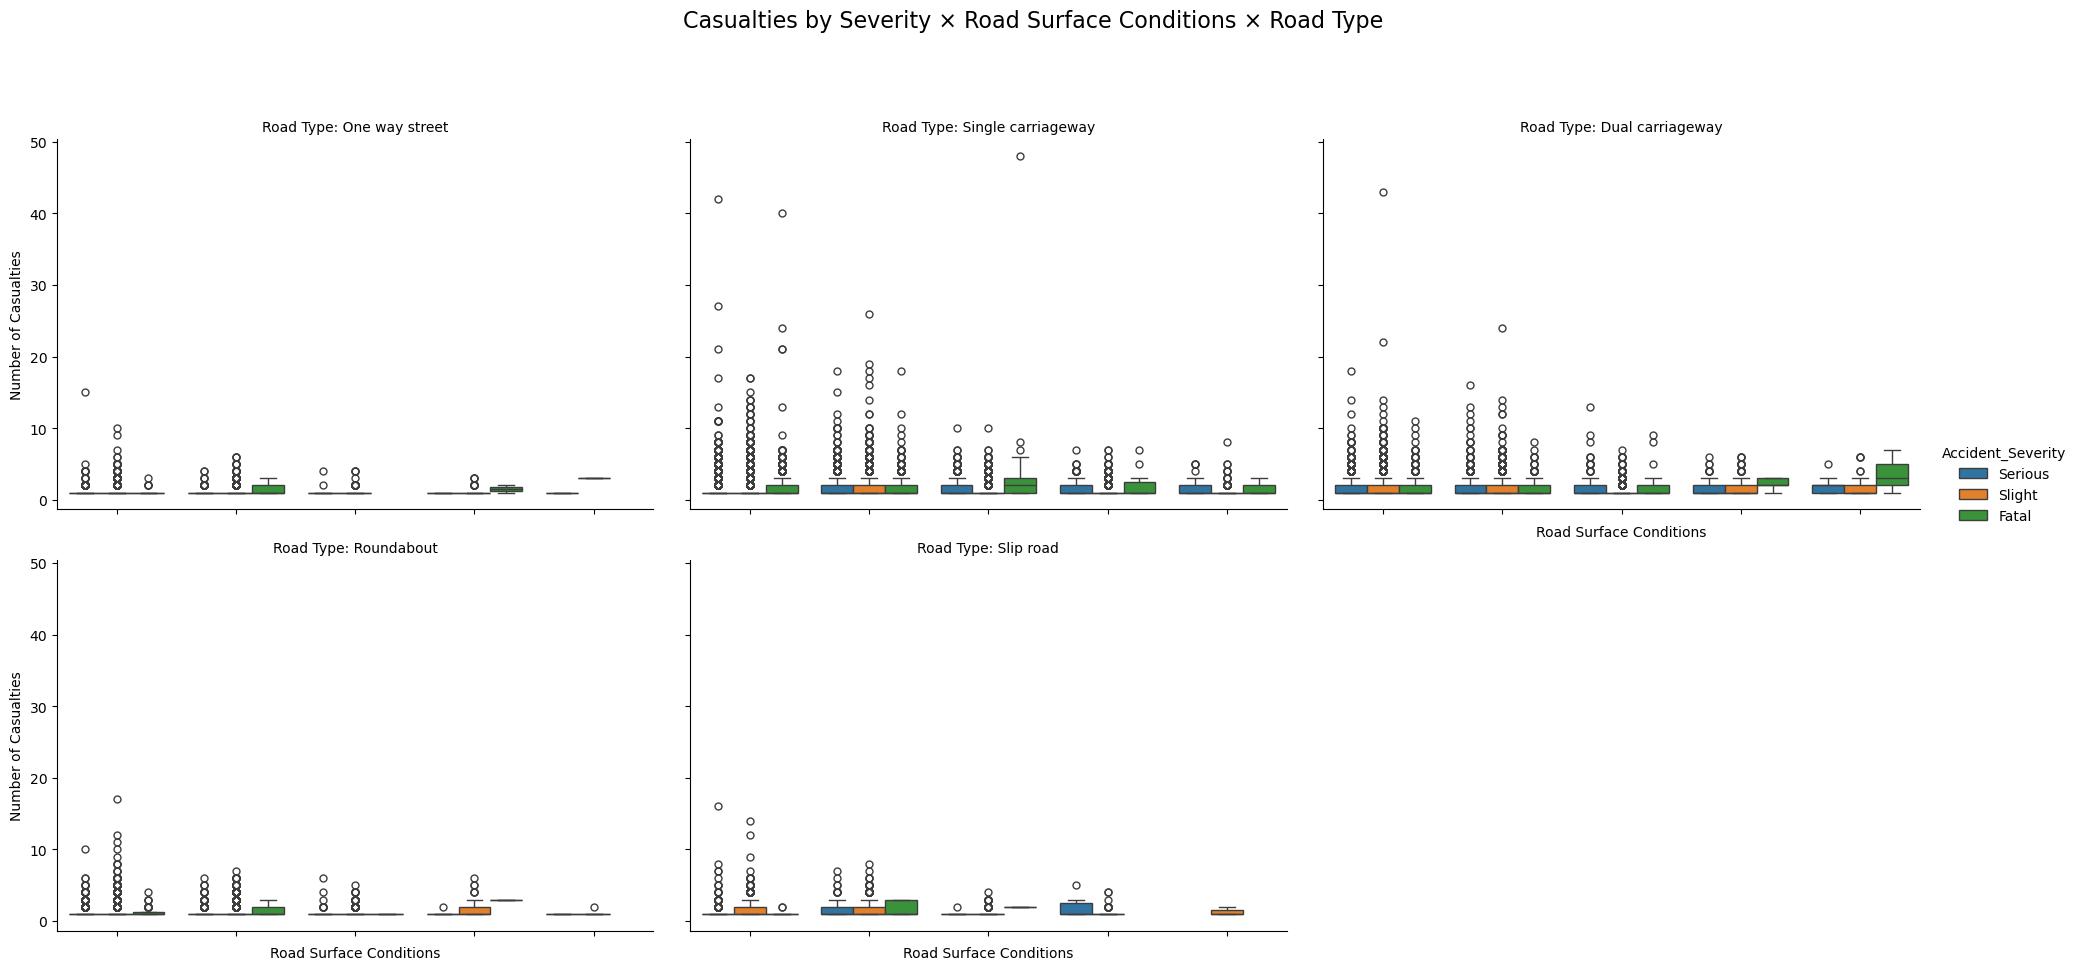

In [16]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# Faceted boxplot: Casualties by Severity × Weather Conditions × Urban/Rural Area

g = sns.catplot(
    x="Road_Surface_Conditions",
    y="Number_of_Casualties",
    hue="Accident_Severity",
    col="Road_Type",
    data=df,
    kind="box",
    col_wrap=3,     # Wrap columns into rows
    height=5,
    aspect=1.3
)

# Improve readability
g.set_titles("Road Type: {col_name}")
g.set_axis_labels("Road Surface Conditions", "Number of Casualties")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Casualties by Severity × Road Surface Conditions × Road Type", fontsize=16)

plt.show()


#### 💡Insight:

Severe weather (e.g., rain, snow, fog) tends to correlate with higher casualties in rural areas due to poor visibility and road conditions.

Urban areas often show higher accident counts but fewer casualties per accident, possibly due to lower speed limits.

Rural accidents under poor weather conditions show wider variability, indicating potential for severe outcomes.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 12. Casualties by Severity × Urban/Rural Area × Weather Conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 65%;"> </div>

#### Graph Faceted Barplot

Average casualties for each weather condition under different urban/rural areas, with severity level as the hue.

#### ⚡Focus

Understand how weather conditions and urban/rural location jointly affect accident severity and casualty counts.

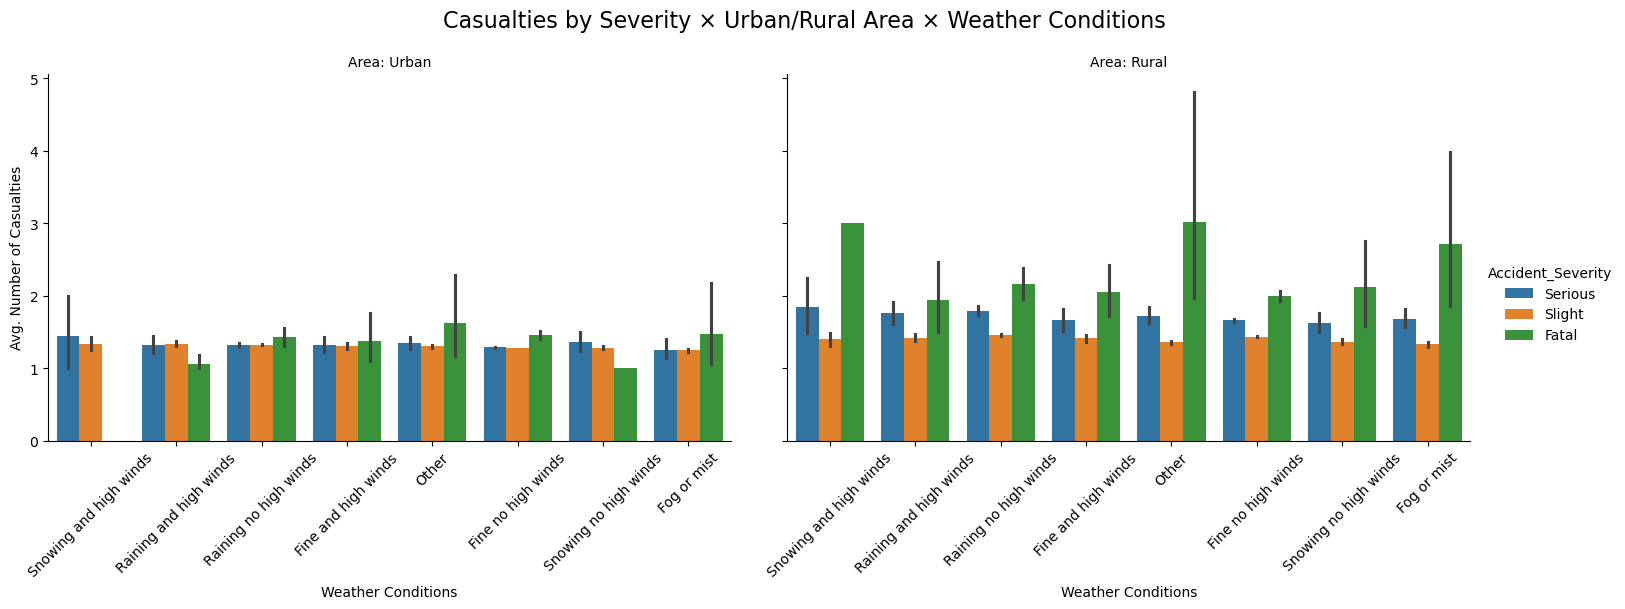

In [18]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# Calculate average casualties per Weather_Conditions for sorting
order = (
    df.groupby("Weather_Conditions")["Number_of_Casualties"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# Faceted barplot: Casualties by Severity × Urban/Rural Area × Weather Conditions
g = sns.catplot(
    x="Weather_Conditions",
    y="Number_of_Casualties",
    hue="Accident_Severity",
    col="Urban_or_Rural_Area",
    data=df,
    kind="bar",
    col_wrap=2,
    height=5,
    aspect=1.5,
    order=order     # Sort by average casualties
)

# Improve readability
g.set_titles("Area: {col_name}")
g.set_axis_labels("Weather Conditions", "Avg. Number of Casualties")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Casualties by Severity × Urban/Rural Area × Weather Conditions", fontsize=16)

plt.show()


#### 💡Insight

Rainy and Foggy conditions show higher average casualties, especially in rural areas.

Urban areas have more accidents, but rural areas see higher casualties per accident under severe weather.

Clear weather has the highest frequency of accidents but often lower casualties per accident, likely due to better control and visibility.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 13. Mean Number of Casualties by Road Surface × Weather × Severity.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 67%;"> </div>

#### Graph: Faceted Heatmap.

Each subplot shows the average number of casualties for combinations of Road Surface Conditions (Y-axis) and Weather Conditions (X-axis), separated by Accident Severity. Cells are color-coded according to the mean casualties, and high-risk values (top 25%) are highlighted in bold.

#### ⚡Focus

Examine how different road surface types interact with weather conditions to influence accident severity and casualty counts.

Identify high-risk scenarios where the combination of surface and weather leads to more casualties.

Compare patterns across different severity levels side by side.

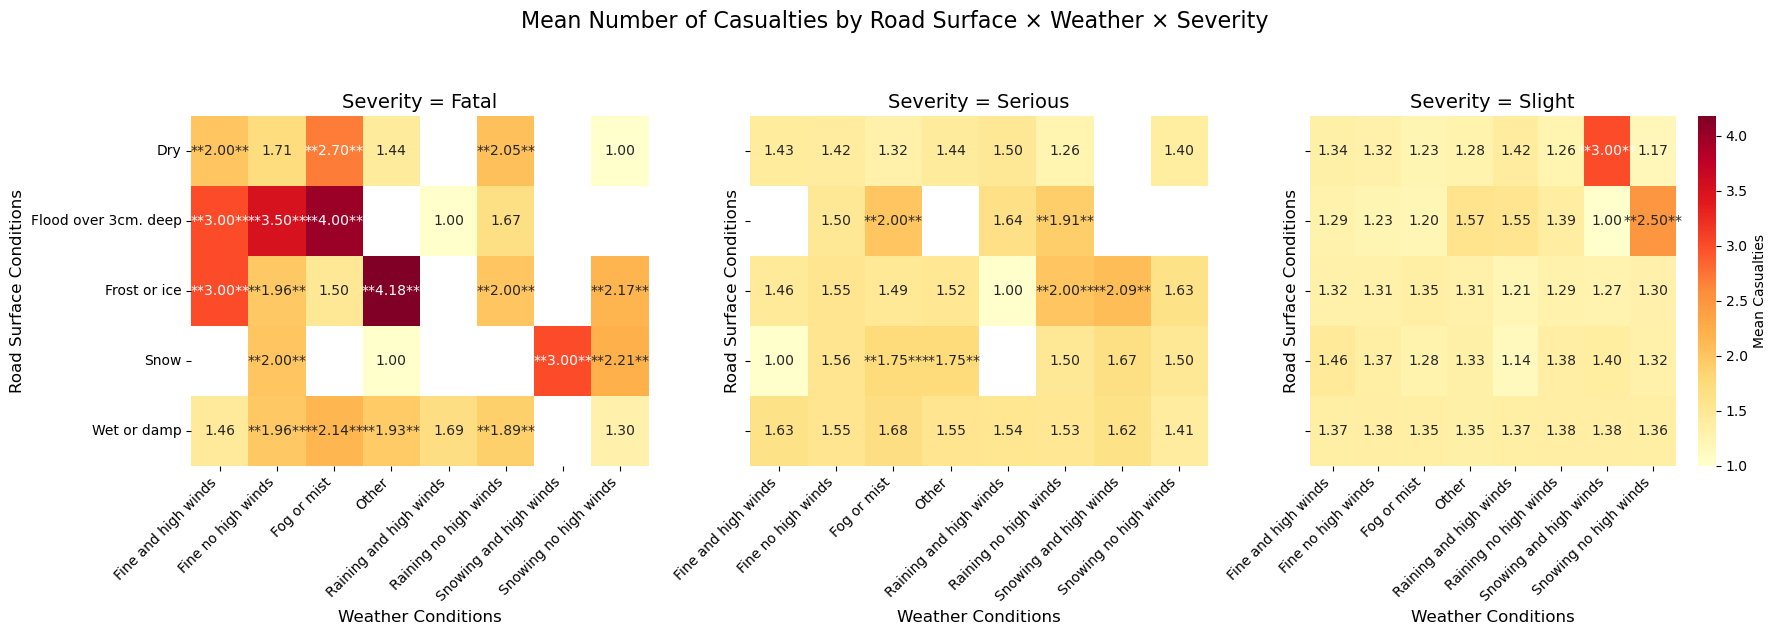

In [19]:
# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
# All unique road surfaces and weather conditions
all_roads = sorted(df["Road_Surface_Conditions"].unique())
all_weather = sorted(df["Weather_Conditions"].unique())

# Group and calculate mean casualties
heatmap_data = (
    df.groupby(["Road_Surface_Conditions", "Weather_Conditions", "Accident_Severity"])
      ["Number_of_Casualties"]
      .mean()
      .reset_index()
)

# Threshold for high-risk cells
high_risk_threshold = heatmap_data["Number_of_Casualties"].quantile(0.75)

# Unique severities
severities = heatmap_data["Accident_Severity"].unique()
num_severities = len(severities)

# Find common color scale limits
vmin = heatmap_data["Number_of_Casualties"].min()
vmax = heatmap_data["Number_of_Casualties"].max()

# Create subplots
fig, axes = plt.subplots(1, num_severities, figsize=(6*num_severities, 6), sharey=True)

for ax, severity in zip(axes, severities):
    # Pivot and reindex to ensure all road surfaces and weather conditions are present
    pivot_table = (
        heatmap_data[heatmap_data["Accident_Severity"] == severity]
        .pivot(index="Road_Surface_Conditions", columns="Weather_Conditions", values="Number_of_Casualties")
        .reindex(index=all_roads, columns=all_weather, fill_value=0)
    )

    # Annotate high-risk cells
    annot = pivot_table.copy()
    for col in annot.columns:
        annot[col] = annot[col].map(lambda x: f"{x:.2f}" if x < high_risk_threshold else f"**{x:.2f}**")

    sns.heatmap(
        pivot_table,
        annot=annot,
        fmt='',
        cmap="YlOrRd",
        vmin=vmin, vmax=vmax,
        cbar=(ax==axes[-1]),
        cbar_kws={'label': 'Mean Casualties'},
        ax=ax
    )
    
    ax.set_title(f"Severity = {severity}", fontsize=14)
    ax.set_xlabel("Weather Conditions", fontsize=12)
    ax.set_ylabel("Road Surface Conditions", fontsize=12)
    
    # Ensure all road surface labels appear on Y-axis
    ax.set_yticks([i + 0.5 for i in range(len(all_roads))])
    ax.set_yticklabels(all_roads, rotation=0, fontsize=10)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)

plt.suptitle("Mean Number of Casualties by Road Surface × Weather × Severity", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


#### 💡Insight

Surfaces like Wet, Snow, or Ice combined with adverse weather (Rain, Snow, Fog) show higher average casualties, especially for severe accidents.

Dry surfaces under clear weather generally have low casualties, even for moderate severity.

Highlighting high-risk cells makes it easy to pinpoint dangerous combinations, which can inform road safety interventions and preventive measures.

The consistent color scale across severities helps quickly compare severity levels for the same road/weather conditions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

### 14. Average Casualties by Junction Detail × Road Surface Conditions × Severity (Sorted by Total Casualties).

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 89%;"> </div>

# MADE IT AS "MARK DOWN" BECAUSE IT IS UNABE TO LOAD IN GITHUB.
#### Graph Faceted Barplot.

Each subplot represents a Road Surface Condition. Bars show the average number of casualties for each Junction Detail, sorted from highest to lowest total casualties. Accident Severity (Slight, Serious, Fatal) is color-coded using a custom palette (green → slight, orange → serious, red → fatal). Each bar is annotated with its exact value.

#### ⚡Focus

Identify which junctions contribute most to casualties under each road surface condition.

Compare severity-specific risks across junction types and road surfaces.

Make high-risk junctions immediately visible through sorting and annotations.

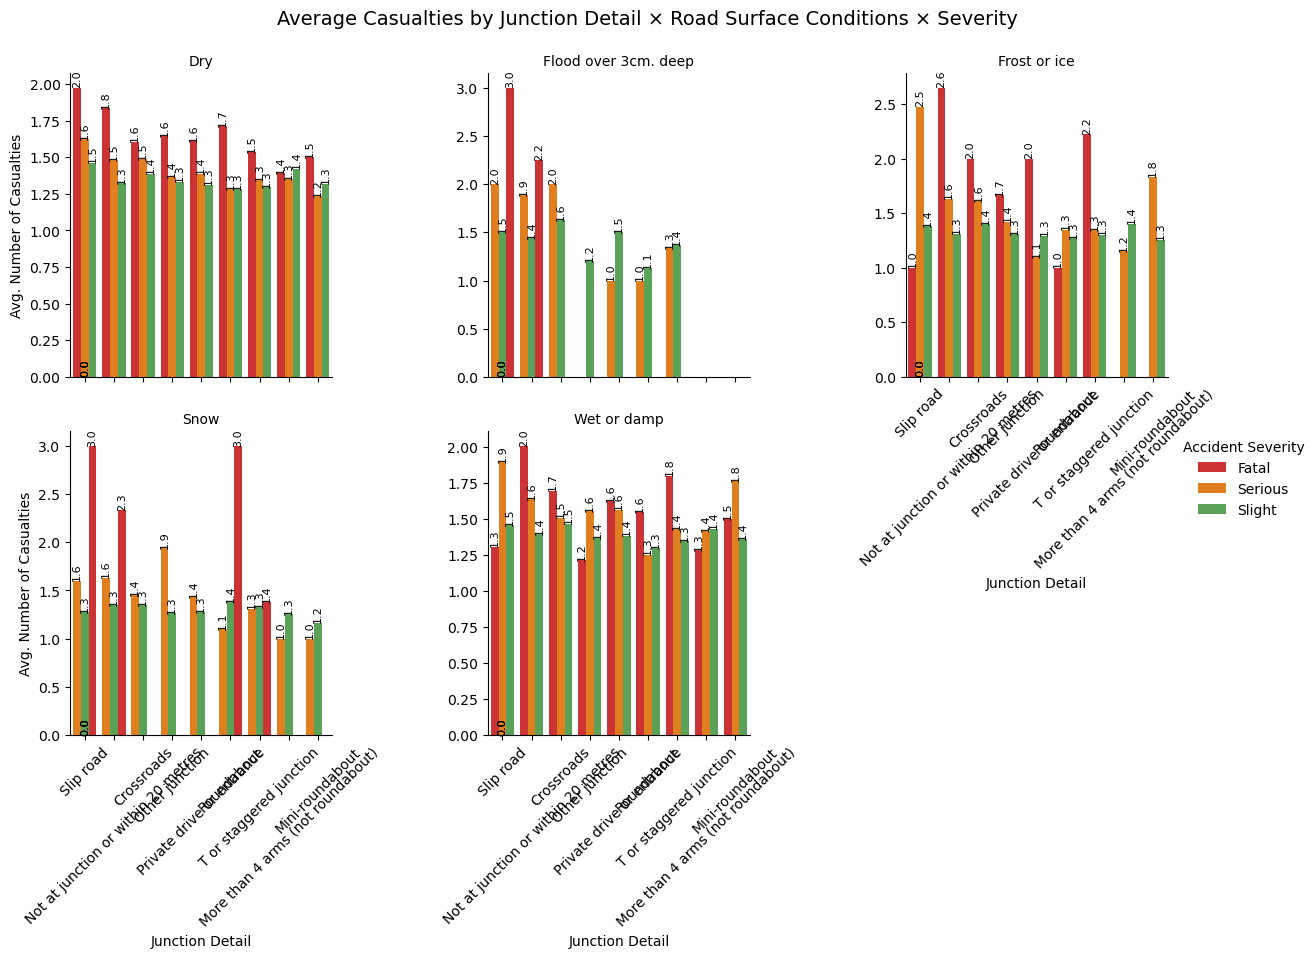

In [21]:
# Compute mean casualties per combination
grouped = (
    df.groupby(["Road_Surface_Conditions", "Junction_Detail", "Accident_Severity"])
      ["Number_of_Casualties"].mean()
      .reset_index()
)

# Define severity palette
palette = {
    "Slight": "#4daf4a",   # Green
    "Serious": "#ff7f00",  # Orange
    "Fatal": "#e41a1c"     # Red
}

# Facet grid barplots
g = sns.FacetGrid(
    grouped, 
    col="Road_Surface_Conditions", 
    col_wrap=3, 
    height=4, 
    sharey=False
)

# Map bars sorted by total casualties per junction
def sorted_barplot(data, **kwargs):
    # Sum casualties across severities for sorting
    order = data.groupby("Junction_Detail")["Number_of_Casualties"].sum().sort_values(ascending=False).index
    ax = sns.barplot(
        data=data,
        x="Junction_Detail",
        y="Number_of_Casualties",
        hue="Accident_Severity",
        palette=palette,
        order=order,
        **kwargs
    )
    # Annotate bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, rotation=90)
    return ax

g.map_dataframe(sorted_barplot)

# Styling
g.add_legend(title="Accident Severity")
g.set_axis_labels("Junction Detail", "Avg. Number of Casualties")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.tick_params(axis="x", rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average Casualties by Junction Detail × Road Surface Conditions × Severity", fontsize=14)
plt.show()


#### 💡Insight

Crossroads and Mini-roundabouts consistently have the highest average casualties, especially under Wet or Snow surfaces.

Slight severity dominates simpler junctions like T-junctions, while Serious and Fatal accidents cluster at complex junctions.

Annotated values and sorted bars make it easy to prioritize high-risk locations for targeted safety measures.

This visualization clearly shows how road surface conditions amplify risk at complex junctions.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 99%;"> </div>

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 99%;"> </div>

## Geograph Map

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 19%;"> </div>

In [22]:
#Check the Lat/long field.
type(df.loc[0, 'GeoPoint'])

str

In [23]:
# Convert GeoPoint string to float with full precision and created two fields.
df['Latitude'] = df['GeoPoint'].apply(lambda x: float(x.strip('()').split(',')[0]))
df['Longitude'] = df['GeoPoint'].apply(lambda x: float(x.strip('()').split(',')[1]))

# Optional: display full precision
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Check
df[['GeoPoint','Latitude','Longitude']].head()


,GeoPoint,Latitude,Longitude
0,"(51.512273, -0.201349)",51.512273,-0.201349
1,"(51.514399, -0.199248)",51.514399,-0.199248
2,"(51.486668, -0.179599)",51.486668,-0.179599
3,"(51.507804, -0.20311)",51.507804,-0.203110
4,"(51.482076, -0.173445)",51.482076,-0.173445


### Make the Risk Score and Map the 10 Top Cities. 

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 45%;"> </div>

In [24]:
# Risk score Calculation.
total_groupby = df['Local_Authority_District'].value_counts()
serious_or_fatal = df[df['Accident_Severity'].isin(['Serious', 'Fatal'])]
serious_fatal_total_groupby = serious_or_fatal['Local_Authority_District'].value_counts()

#total_groupby
#serious_or_fatal
#serious_fatal_total_groupby

In [25]:
risk_df = pd.DataFrame({
    'Total_Accidents': total_groupby,
    'Serious_or_Fatal': serious_fatal_total_groupby
}).fillna(0)

risk_df['Risk_Score (%)'] = (risk_df['Serious_or_Fatal'] / risk_df['Total_Accidents']) * 100
top_risky = risk_df.sort_values(by='Risk_Score (%)', ascending=False).head(20)

print("Top 10 Most Dangerous Districts Based on Risk Score:\n")
print(top_risky)

Top 10 Most Dangerous Districts Based on Risk Score:

                          Total_Accidents  Serious_or_Fatal  Risk_Score (%)
Local_Authority_District                                                   
Ryedale                               341               115       33.724340
Aberdeenshire                         687               205       29.839884
Richmondshire                         314                93       29.617834
Dumfries and Galloway                 388               113       29.123711
South Northamptonshire                413               119       28.813559
Maldon                                245                68       27.755102
Craven                                369               101       27.371274
Daventry                              395               105       26.582278
Isle of Anglesey                      261                69       26.436782
Tynedale                               35                 9       25.714286
Winchester                        

In [ ]:
#pip install folium
#pip uninstall folium

### Create the Map, with TopCities Pointed and With ToolTips.

<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #f0f8ff; text-align: left;width: 55%;"> </div>

In [26]:
# As of now block this working code. As it is not static its not working in the github. Also the code is blocking. 
# So its marking now as Mark down

import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

# Step 0: Ensure district column exists
top_risky_coords = top_risky.copy()
top_risky_coords['District'] = top_risky_coords.index  # create column from index

# Step 1: Get mean lat/lon per district
district_coords = df.groupby('Local_Authority_District')[['Latitude','Longitude']].mean().reset_index()
district_coords.rename(columns={'Local_Authority_District':'District'}, inplace=True)

# Step 2: Merge top risky districts with coordinates
top_risky_coords = pd.merge(top_risky_coords, district_coords, on='District', how='left')

# Step 3: Normalize Risk_Score for color mapping and radius
norm = mcolors.Normalize(vmin=top_risky_coords['Risk_Score (%)'].min(),
                         vmax=top_risky_coords['Risk_Score (%)'].max())
cmap = cm.Reds

# Radius scaling: adjust min/max radius as needed
min_radius = 5
max_radius = 20
risk_min = top_risky_coords['Risk_Score (%)'].min()
risk_max = top_risky_coords['Risk_Score (%)'].max()
def scale_radius(risk):
    return min_radius + (risk - risk_min)/(risk_max - risk_min)*(max_radius - min_radius)

# Step 4: Create Folium map with fixed frame size
m = folium.Map(
    location=[54.0, -2.0],
    zoom_start=6,
    tiles='OpenStreetMap',
    width=900,    # frame width in pixels
    height=400    # frame height in pixels
)

# Step 5: Add circles with serial numbers and tooltips
for i, row in top_risky_coords.iterrows():
    rgba_color = cmap(norm(row['Risk_Score (%)']))
    hex_color = mcolors.to_hex(rgba_color)
    radius = scale_radius(row['Risk_Score (%)'])
    
    tooltip_text = (
        f"<b>{i+1}. {row['District']}</b><br>"
        f"Total Accidents: {row['Total_Accidents']}<br>"
        f"Serious/Fatal: {row['Serious_or_Fatal']}<br>"
        f"Risk Score: {row['Risk_Score (%)']:.2f}%"
    )
    
    # Circle marker
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color=hex_color,
        fill=True,
        fill_color=hex_color,
        fill_opacity=0.7,
        popup=folium.Popup(tooltip_text, max_width=250),
        tooltip=folium.Tooltip(tooltip_text, sticky=True)
    ).add_to(m)
    
    # Serial number on top
    folium.map.Marker(
        [row['Latitude'], row['Longitude']],
        icon=folium.DivIcon(
            html=f'<div style="font-size:10pt; font-weight:bold; color:black">{i+1}</div>'
        )
    ).add_to(m)

m


<div style="border: 2px solid #007acc; padding: 2px; border-radius: 10px; background-color: #007acc; text-align: left;width: 99%;"> </div>